In [114]:
import numpy as np

text = open("IMDB_review_labels.txt","r")
t = np.array(text.readlines())
len(t)
type(t)
t.shape

(1000,)

In [115]:
# pip install nltk


In [116]:
import nltk

tokenizer = nltk.RegexpTokenizer(r"\w+")


In [117]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [118]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
filtered_sentence = []
for i in range(len(t)):
  word_tokens =tokenizer.tokenize(t[i])
  filtered_sentence.append([ps.stem(w).lower() for w in word_tokens if not w.lower() in stop_words])
a =filtered_sentence
X = [a[i][0:-1]for i in range(len(a))]
target = [a[i][-1] for i  in range(len(a))]
len(X)

1000

In [119]:
word_ok = []
for line in range(len(X)):
  for i in X[line]:
    word_ok.append(i)
word_once = set(word_ok)

In [120]:
df = {key : 0 for key in word_once}
tf = {key : np.zeros(len(X)) for key in word_once}

count = 0
for line in X:
  for word in set(line):
    df[word] += 1
  for word in line:
    tf[word][count] += 1
  count += 1

In [121]:
tf_idf = []
for word in word_once:
  tf_idf.append(np.log(1 + tf[word])* np.log(len(X)/df[word]))


In [122]:
np.array(tf_idf).T.shape

(1000, 2429)

In [123]:
from sklearn.model_selection import train_test_split # Import train_test_split function

X_train, X_test, y_train, y_test = train_test_split(np.array(tf_idf).T, target, test_size=0.2, random_state=40) # 80% training and 20% test

In [124]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
naive_y_pred = gnb.predict(X_test)

In [125]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, naive_y_pred))

Accuracy: 0.665


In [126]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',C=1E3) 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [127]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.735


In [128]:
import pandas as pd

df=pd.read_csv('binary_2d.csv')
df.head(10)
df.isnull().sum()
df.columns

Index(['0.06274546237201752', '0.029882615052992896', '0'], dtype='object')

In [129]:
x = df[['0.06274546237201752','0.029882615052992896']]
y = df[['0']]

In [130]:
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(x, y, test_size=0.1, random_state=40) # 80% training and 20% test

In [131]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',C=1E3) 

#Train the model using the training sets
clf.fit(X_train_svm, y_train_svm)

#Predict the response for test dataset
y_pred_svm = clf.predict(X_test_svm)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [132]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_svm , y_pred_svm ))

Accuracy: 1.0


In [133]:
clf.coef_

array([[113.3086384 ,  -6.52442706]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
No handles with labels found to put in legend.


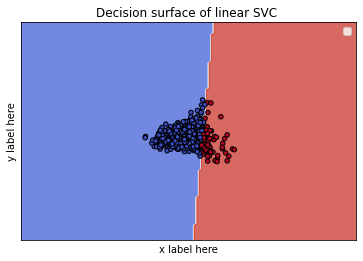

In [134]:
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# X , X_test_svm, y , y_test_svm = train_test_split(x, y, test_size=0.1, random_state=40)
X = X_train_svm.values
y = y_train_svm.values
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# model = svm.SVC(kernel='linear')
# clf = model.fit(X, y)
clf = svm.SVC(kernel='linear',C=1E3) 
clf.fit(X_train_svm, y_train_svm)
y_pred_svm = clf.predict(X_test_svm)

fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of linear SVC ')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
ax.set_ylabel('y label here')
ax.set_xlabel('x label here')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
ax.legend()
plt.show()